# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned2.csv')
df.head()

piece_count  list_price  num_reviews  play_star_rating  star_rating  \
0    -0.273020       29.99    -0.398512         -0.655279    -0.045687   
1    -0.404154       19.99    -0.398512         -0.655279     0.990651   
2    -0.517242       12.99    -0.147162         -0.132473    -0.460222   
3     0.635296       99.99     0.187972         -1.352353     0.161581   
4     0.288812       79.99    -0.063378         -2.049427     0.161581   

   val_star_rating  ages_10+  ages_10-14  ages_10-16  ages_10-21  ...  \
0        -0.365010         0           0           0           0  ...   
1        -0.365010         0           0           0           0  ...   
2        -0.204063         0           0           0           0  ...   
3         0.117830         0           0           0           0  ...   
4        -0.204063         0           0           0           0  ...   

   country_NZ  country_PL  country_PT  country_US  review_difficulty_Average  \
0           0           0           0           1                          1   
1           0           0           0           1                          0   
2           0           0           0           1                          0   
3           0           0           0           1                          1   
4           0           0           0           1                          0   

   review_difficulty_Challenging  review_difficulty_Easy  \
0                              0                       0   
1                              0                       1   
2                              0                       1   
3                              0                       0   
4                              1                       0   

   review_difficulty_Very Challenging  review_difficulty_Very Easy  \
0                                   0                            0   
1                                   0                            0   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   

   review_difficulty_unknown  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 103 columns]

In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]
df.head()

piece_count  list_price  num_reviews  play_star_rating  star_rating  \
0    -0.273020       29.99    -0.398512         -0.655279    -0.045687   
1    -0.404154       19.99    -0.398512         -0.655279     0.990651   
2    -0.517242       12.99    -0.147162         -0.132473    -0.460222   
3     0.635296       99.99     0.187972         -1.352353     0.161581   
4     0.288812       79.99    -0.063378         -2.049427     0.161581   

   val_star_rating  ages_10plus  ages_10_14  ages_10_16  ages_10_21  ...  \
0        -0.365010            0           0           0           0  ...   
1        -0.365010            0           0           0           0  ...   
2        -0.204063            0           0           0           0  ...   
3         0.117830            0           0           0           0  ...   
4        -0.204063            0           0           0           0  ...   

   country_NZ  country_PL  country_PT  country_US  review_difficulty_Average  \
0           0           0           0           1                          1   
1           0           0           0           1                          0   
2           0           0           0           1                          0   
3           0           0           0           1                          1   
4           0           0           0           1                          0   

   review_difficulty_Challenging  review_difficulty_Easy  \
0                              0                       0   
1                              0                       1   
2                              0                       1   
3                              0                       0   
4                              1                       0   

   review_difficulty_Very_Challenging  review_difficulty_Very_Easy  \
0                                   0                            0   
1                                   0                            0   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   

   review_difficulty_unknown  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 103 columns]

In [14]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [13]:
# Your code here - Split into train and test
train, test = train_test_split(df)

print(len(train), len(test))
train.head()

8152 2718


piece_count  list_price  num_reviews  play_star_rating  star_rating  \
1478     0.142038     85.3878    -0.230945          0.390333    -0.874757   
6125    -0.528070     36.5878    -0.342657          0.738870     0.990651   
4762    -0.499196     12.0000    -0.286801          0.216064     0.161581   
8134    -0.588223     18.2878    -0.426440         -2.397964    -1.082024   
2602    -0.306705     12.4722    -0.398512          1.087407     0.990651   

      val_star_rating  ages_10plus  ages_10_14  ages_10_16  ages_10_21  ...  \
1478        -1.491638            0           0           0           0  ...   
6125        -0.365010            0           0           0           0  ...   
4762         0.117830            0           0           0           0  ...   
8134        -1.974478            0           0           0           0  ...   
2602         1.244458            0           0           0           0  ...   

      country_NZ  country_PL  country_PT  country_US  \
1478           0           0           0           0   
6125           0           0           0           0   
4762           0           0           0           0   
8134           0           0           0           0   
2602           0           0           0           0   

      review_difficulty_Average  review_difficulty_Challenging  \
1478                          1                              0   
6125                          0                              0   
4762                          0                              0   
8134                          0                              0   
2602                          1                              0   

      review_difficulty_Easy  review_difficulty_Very_Challenging  \
1478                       0                                   0   
6125                       0                                   0   
4762                       0                                   0   
8134                       1                                   0   
2602                       0                                   0   

      review_difficulty_Very_Easy  review_difficulty_unknown  
1478                            0                          0  
6125                            1                          0  
4762                            0                          1  
8134                            0                          0  
2602                            0                          0  

[5 rows x 103 columns]

In [6]:
y = df['list_price']
X = df.drop('list_price', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state = 117)
print(len(X_train))
print(len(y_test))

8152
2718


In [18]:
X_train = sm.add_constant(X_train)

In [20]:
predictors2 = '+'.join(x_cols)
formula = outcome + '~' + predictors2
model_train = sm.OLS(y_train, X_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     539.7
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:24:25   Log-Likelihood:                -40512.
No. Observations:                8152   AIC:                         8.121e+04
Df Residuals:                    8057   BIC:                         8.188e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               64.3210      1.775     36.241      0.000      60.842      67.800
piece_count                                         77.2445      0.884     87.356      0.000      75.511      78.978
num_reviews                                          6.8043      0.671     10.137      0.000       5.488       8.120
play_star_rating                                     5.3833      0.629      8.559      0.000       4.150       6.616
star_rating                                         -0.9025      0.713     -1.266      0.206      -2.300       0.495
val_star_rating                                     -8.6944      0.643    -13.530      0.000      -9.954      -7.435
ages_10plus                                        119.3525      6.831     17.473      0.000     105.963     132.742
ages_10_14                                         -18.4613      9.775     -1.889      0.059     -37.623       0.701
ages_10_16                                         -10.4751      4.095     -2.558      0.011     -18.502      -2.449
ages_10_21                                          55.8114      7.514      7.427      0.000      41.081      70.542
ages_11_16                                         -16.6118      5.764     -2.882      0.004     -27.911      -5.313
ages_12plus                                         62.6456      5.436     11.525      0.000      51.990      73.301
ages_12_16                                         -60.5062      6.648     -9.102      0.000     -73.538     -47.475
ages_14plus                                         15.7118      4.040      3.889      0.000       7.793      23.631
ages_16plus                                         22.0794      6.040      3.656      0.000      10.240      33.919
ages_1half_3                                        -8.2946      2.321     -3.574      0.000     -12.844      -3.745
ages_1half_5                                        -4.3146      2.806     -1.538      0.124      -9.815       1.186
ages_2_5                                            15.8384      1.638      9.668      0.000      12.627      19.050
ages_4plus                                         -19.5149      6.878     -2.837      0.005     -32.998      -6.032
ages_4_7                                            -6.7910      3.423     -1.984      0.047     -13.501      -0.081
ages_4_99                                           -2.1288      3.861     -0.551      0.581      -9.698       5.440
ages_5plus                                          -9.4817      3.309     -2.866      0.004     -15.968      -2.995
ages_5_12                                          -33.0859      3.102    -10.665      0.000     -39.167     -27.004
ages_5_8                                 

In [33]:
# Your code here - Fit the actual model
# Outcome is your Y variable... what you're looking for.
# This is the base model... from here you can only go up (hopefully...)
# If you split up with X_train and Y_train, that'd go here... let's do that actually
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     578.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:44:08   Log-Likelihood:                -40323.
No. Observations:                8152   AIC:                         8.084e+04
Df Residuals:                    8057   BIC:                         8.150e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7431      1.852     34.421      0.000      60.113      67.373
piece_count                                         79.5269      0.898     88.609      0.000      77.768      81.286
num_reviews                                          6.4531      0.666      9.696      0.000       5.148       7.758
play_star_rating                                     4.7450      0.606      7.828      0.000       3.557       5.933
star_rating                                         -1.4104      0.694     -2.034      0.042      -2.770      -0.051
val_star_rating                                     -7.7945      0.622    -12.522      0.000      -9.015      -6.574
ages_10plus                                        121.6724      6.467     18.813      0.000     108.995     134.350
ages_10_14                                         -21.1450      8.746     -2.418      0.016     -38.289      -4.001
ages_10_16                                         -10.8249      3.967     -2.728      0.006     -18.602      -3.048
ages_10_21                                          48.8750      7.175      6.812      0.000      34.810      62.940
ages_11_16                                         -22.9120      5.840     -3.923      0.000     -34.360     -11.464
ages_12plus                                         64.2021      5.560     11.546      0.000      53.302      75.102
ages_12_16                                         -62.0297      6.610     -9.384      0.000     -74.988     -49.072
ages_14plus                                         14.6640      4.050      3.621      0.000       6.725      22.603
ages_16plus                                         23.0688      6.060      3.807      0.000      11.190      34.948
ages_1half_3                                        -8.5322      2.305     -3.701      0.000     -13.051      -4.013
ages_1half_5                                        -3.6139      2.975     -1.215      0.225      -9.446       2.218
ages_2_5                                            16.0826      1.655      9.719      0.000      12.839      19.326
ages_4plus                                         -17.5466      6.524     -2.690      0.007     -30.335      -4.759
ages_4_7                                            -5.1130      3.180     -1.608      0.108     -11.347       1.121
ages_4_99                                           -2.4389      3.679     -0.663      0.507      -9.650       4.772
ages_5plus                                          -7.3784      3.357     -2.198      0.028     -13.959      -0.798
ages_5_12                                          -30.0115      3.171     -9.465      0.000     -36.227     -23.796
ages_5_8                                 

### Side note:

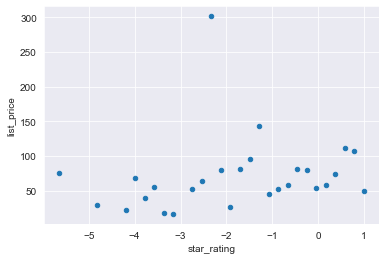

In [34]:
df.groupby('star_rating').mean().reset_index().plot.scatter('star_rating', 'list_price');

Considered categorising ratings but there isn't a complete set of values, and it has a low p-value anyway: 0.009. And with that ~300 value -could do more harm than good.

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [35]:
# Your code here - Remove features which do not appear to be statistically relevant
#Removing columns with high p-values
pv = pd.DataFrame(model.pvalues)
pv = pv.drop('Intercept').reset_index().rename(columns= 
                                               {0:'p_value', 'index': 'cols'})
x2_cols = list(pv[pv.p_value <= 0.05].cols)

In [36]:
# Your code here - Refit the model
predictors = '+'.join(x2_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     776.7
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:44:22   Log-Likelihood:                -40334.
No. Observations:                8152   AIC:                         8.081e+04
Df Residuals:                    8081   BIC:                         8.131e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.5894      1.550     42.327      0.000      62.552      68.627
piece_count                                         79.7889      0.874     91.315      0.000      78.076      81.502
num_reviews                                          6.3894      0.653      9.781      0.000       5.109       7.670
play_star_rating                                     4.7170      0.590      7.993      0.000       3.560       5.874
star_rating                                         -1.3477      0.677     -1.990      0.047      -2.675      -0.020
val_star_rating                                     -7.7142      0.589    -13.088      0.000      -8.870      -6.559
ages_10plus                                        114.9284      4.697     24.468      0.000     105.721     124.136
ages_10_14                                         -17.8986      9.034     -1.981      0.048     -35.607      -0.190
ages_10_16                                          -8.2935      3.741     -2.217      0.027     -15.627      -0.960
ages_10_21                                          39.1133      3.254     12.019      0.000      32.734      45.492
ages_11_16                                         -21.3384      5.656     -3.773      0.000     -32.425     -10.252
ages_12plus                                         62.4770      5.999     10.414      0.000      50.717      74.237
ages_12_16                                         -58.2413      6.849     -8.504      0.000     -71.667     -44.816
ages_14plus                                         17.0864      4.591      3.722      0.000       8.087      26.085
ages_16plus                                         24.1587      6.721      3.595      0.000      10.984      37.333
ages_1half_3                                        -4.6550      4.615     -1.009      0.313     -13.701       4.391
ages_2_5                                            19.6566      4.051      4.852      0.000      11.715      27.598
ages_4plus                                         -15.9356      9.949     -1.602      0.109     -35.439       3.568
ages_5plus                                          -6.8955      3.312     -2.082      0.037     -13.387      -0.404
ages_5_12                                          -26.8925      2.649    -10.151      0.000     -32.086     -21.699
ages_6plus                                         -19.3627      5.424     -3.570      0.000     -29.996      -8.730
ages_6_12                                          -15.3857      1.866     -8.246      0.000     -19.043     -11.728
ages_7_12                                          -15.1793      2.152     -7.053      0.000     -19.398     -10.960
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [37]:
# Your code here - Continue to refine the model
while True:
    
    pv = pd.DataFrame(model2.pvalues)
    pv = pv.drop('Intercept').reset_index().rename(columns= 
                                                {0:'p_value', 'index': 'cols'})
    x2_cols = list(pv[pv.p_value <= 0.05].cols)
    if len(x2_cols) == len(pv):
        break
    # Your code here - Refit the model
    predictors = '+'.join(x2_cols)
    formula = outcome + '~' + predictors
    model2 = ols(formula=formula, data=train).fit()
    
model2.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     984.7
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:44:26   Log-Likelihood:                -40355.
No. Observations:                8152   AIC:                         8.082e+04
Df Residuals:                    8096   BIC:                         8.121e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.1608      1.287     52.201      0.000      64.639      69.683
piece_count                                         79.8554      0.874     91.398      0.000      78.143      81.568
num_reviews                                          6.1493      0.620      9.918      0.000       4.934       7.365
play_star_rating                                     4.2212      0.507      8.323      0.000       3.227       5.215
val_star_rating                                     -8.4270      0.482    -17.494      0.000      -9.371      -7.483
ages_10plus                                        115.7482      4.630     24.998      0.000     106.672     124.825
ages_10_16                                          -7.9246      3.658     -2.166      0.030     -15.096      -0.753
ages_10_21                                          39.2226      3.173     12.363      0.000      33.003      45.442
ages_11_16                                         -20.6804      5.615     -3.683      0.000     -31.688      -9.673
ages_12plus                                         63.8040      5.967     10.692      0.000      52.107      75.501
ages_12_16                                         -57.8026      6.815     -8.482      0.000     -71.161     -44.444
ages_14plus                                         19.8522      4.474      4.437      0.000      11.082      28.622
ages_16plus                                         26.9292      6.620      4.068      0.000      13.952      39.907
ages_2_5                                            22.3800      1.835     12.195      0.000      18.783      25.977
ages_5plus                                          -6.9797      3.293     -2.120      0.034     -13.435      -0.525
ages_5_12                                          -24.1741      2.410    -10.032      0.000     -28.898     -19.450
ages_6plus                                         -16.3372      5.090     -3.210      0.001     -26.315      -6.359
ages_6_12                                          -13.2151      1.646     -8.027      0.000     -16.443      -9.988
ages_7_12                                          -14.1186      2.016     -7.004      0.000     -18.070     -10.167
ages_7_14                                           -9.7245      1.767     -5.504      0.000     -13.188      -6.261
ages_8plus                                          13.2245      4.212      3.140      0.002       4.969      21.480
ages_8_12                                          -15.4164      2.620     -5.883      0.000     -20.553     -10.280
ages_8_14                                           -9.8080      1.910     -5.134      0.000     -13.553      -6.063
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

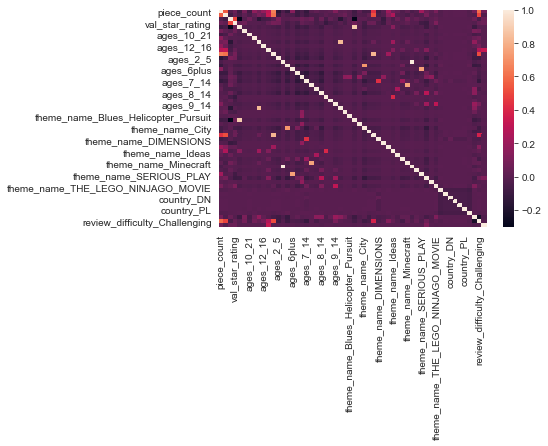

In [38]:
# Your code here - Code a way to identify multicollinearity
dfp = df[x2_cols]
sns.heatmap(dfp.corr());


In [39]:
corr = dfp.corr().abs().stack().reset_index().sort_values(0, ascending = False)
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr = corr.set_index('pairs').drop(['level_0', 'level_1'], axis=1)
corr.columns = ['cc']
corr[(corr.cc > 0.70) & (corr.cc < 1)].drop_duplicates()

cc
pairs                                             
(ages_10plus, theme_name_BrickHeadz)      0.891791
(ages_12plus, theme_name_Architecture)    0.835991
(theme_name_Creator_Expert, ages_16plus)  0.820996
(ages_8plus, theme_name_Minecraft)        0.762592
(ages_6plus, theme_name_SERIOUS_PLAY)     0.751132
(ages_5_12, theme_name_City)              0.716653

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [40]:
# Your code here - Subset features based on multicollinearity
dfm = dfp.drop(['ages_10plus','ages_12plus', 'ages_16plus', 'ages_10_21', 
               'ages_6plus', 'val_star_rating', 'ages_5_12'], axis = 1)
print(len(dfp.columns), len(dfm.columns))

56 49


In [41]:
# Your code here - Refit model with subset features
x3_cols = dfm.columns

predictors = '+'.join(x3_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     941.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:44:43   Log-Likelihood:                -40993.
No. Observations:                8152   AIC:                         8.208e+04
Df Residuals:                    8103   BIC:                         8.243e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           71.6648      1.093     65.570      0.000      69.522      73.807
piece_count                                         81.0471      0.688    117.760      0.000      79.698      82.396
num_reviews                                          4.7570      0.626      7.604      0.000       3.531       5.983
play_star_rating                                    -1.1848      0.454     -2.608      0.009      -2.075      -0.294
ages_10_16                                         -24.5808      3.708     -6.630      0.000     -31.849     -17.313
ages_11_16                                         -33.9772      5.694     -5.967      0.000     -45.139     -22.815
ages_12_16                                         -74.0168      6.893    -10.738      0.000     -87.529     -60.504
ages_14plus                                         -5.4150      3.893     -1.391      0.164     -13.046       2.216
ages_2_5                                            17.1352      1.839      9.319      0.000      13.531      20.739
ages_5plus                                          -8.0186      3.540     -2.265      0.024     -14.958      -1.079
ages_6_12                                          -15.1069      1.473    -10.256      0.000     -17.994     -12.219
ages_7_12                                          -19.5562      1.990     -9.828      0.000     -23.457     -15.656
ages_7_14                                          -14.1220      1.726     -8.182      0.000     -17.506     -10.738
ages_8plus                                           7.5401      4.415      1.708      0.088      -1.115      16.195
ages_8_12                                          -20.6375      2.641     -7.816      0.000     -25.814     -15.461
ages_8_14                                          -16.1037      1.851     -8.699      0.000     -19.732     -12.475
ages_9plus                                          42.6935     10.858      3.932      0.000      21.409      63.978
ages_9_12                                          -23.4000      6.750     -3.467      0.001     -36.631     -10.169
ages_9_14                                          -15.8166      2.562     -6.174      0.000     -20.838     -10.795
theme_name_Architecture                            -30.7733      3.225     -9.543      0.000     -37.094     -24.452
theme_name_BOOST                                    85.3332      9.529      8.955      0.000      66.654     104.012
theme_name_Blues_Helicopter_Pursuit                 23.0171      9.447      2.436      0.015       4.498      41.536
theme_name_BrickHeadz                              -22.9067      2.432     -9.421      0.000     -27.673     -18.140
theme_name_Carnotaurus_Gyrosphere_Escape 

In [17]:
# remove new high pvalues
while True:
    
    pv = pd.DataFrame(model3.pvalues)
    pv = pv.drop('Intercept').reset_index().rename(columns= 
                                                {0:'p_value', 'index': 'cols'})
    x3_cols = list(pv[pv.p_value <= 0.05].cols)
    if len(x3_cols) == len(pv):
        break
    # Your code here - Refit the model
    predictors = '+'.join(x3_cols)
    formula = outcome + '~' + predictors
    model3 = ols(formula=formula, data=train).fit()
    
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:42:50   Log-Likelihood:                -41302.
No. Observations:                8152   AIC:                         8.269e+04
Df Residuals:                    8111   BIC:                         8.297e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           68.4588      0.956     71.633      0.000      66.585      70.332
piece_count                                         77.1857      0.699    110.480      0.000      75.816      78.555
num_reviews                                          4.7501      0.636      7.471      0.000       3.504       5.997
play_star_rating                                     4.4475      0.654      6.802      0.000       3.166       5.729
star_rating                                         -7.7188      0.615    -12.560      0.000      -8.924      -6.514
ages_12_16                                         -60.9939      7.181     -8.494      0.000     -75.070     -46.918
ages_14plus                                         16.8342      3.669      4.588      0.000       9.642      24.027
ages_2_5                                            19.0581      1.832     10.401      0.000      15.466      22.650
ages_5plus                                          -6.8034      3.241     -2.099      0.036     -13.156      -0.450
ages_6_12                                          -13.5617      1.425     -9.514      0.000     -16.356     -10.767
ages_7plus                                       -8.664e-14   2.17e-14     -3.990      0.000   -1.29e-13   -4.41e-14
ages_7_12                                          -17.3964      2.034     -8.552      0.000     -21.384     -13.409
ages_7_14                                          -12.2352      1.627     -7.520      0.000     -15.425      -9.046
ages_8_12                                          -15.4723      2.639     -5.864      0.000     -20.644     -10.300
ages_8_14                                          -11.7464      1.695     -6.930      0.000     -15.069      -8.424
ages_9plus                                          32.7180     10.558      3.099      0.002      12.021      53.415
ages_9_12                                          -18.0956      7.205     -2.512      0.012     -32.219      -3.973
theme_name_Architecture                            -19.9985      3.362     -5.949      0.000     -26.588     -13.408
theme_name_BOOST                                    78.5745      9.656      8.138      0.000      59.647      97.502
theme_name_Blues_Helicopter_Pursuit                 23.3511      9.814      2.379      0.017       4.114      42.589
theme_name_BrickHeadz                               -9.5769      2.622     -3.652      0.000     -14.717      -4.437
theme_name_Carnotaurus_Gyrosphere_Escape            53.5204      9.556      5.601      0.000      34.788      72.253
theme_name_Classic                                 -26.0548      2.535    -10.279      0.000     -31.023     -21.086
theme_name_Creator_Expert                

In [42]:
dfp2 = dfm[x3_cols]
dfp2
#recheck for multicollinearity, if I thought there would be many more checks I'd 
#... add this to the while loop
corr = dfp2.corr().abs().stack().reset_index().sort_values(0, ascending = False)
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr = corr.set_index('pairs').drop(['level_0', 'level_1'], axis=1)
corr.columns = ['cc']
corr[(corr.cc > 0.70) & (corr.cc < 1)].drop_duplicates()

cc
pairs                                       
(theme_name_Minecraft, ages_8plus)  0.762592

In [43]:
dfm2 = dfp2.drop('ages_8plus', axis=1)
x4_cols = dfm2.columns

predictors = '+'.join(x4_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     960.9
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:44:50   Log-Likelihood:                -40994.
No. Observations:                8152   AIC:                         8.208e+04
Df Residuals:                    8104   BIC:                         8.242e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           71.8696      1.086     66.149      0.000      69.740      73.999
piece_count                                         81.0259      0.688    117.734      0.000      79.677      82.375
num_reviews                                          4.7668      0.626      7.619      0.000       3.540       5.993
play_star_rating                                    -1.1783      0.454     -2.594      0.010      -2.069      -0.288
ages_10_16                                         -24.7143      3.707     -6.666      0.000     -31.982     -17.447
ages_11_16                                         -34.0698      5.695     -5.983      0.000     -45.233     -22.907
ages_12_16                                         -74.0863      6.894    -10.747      0.000     -87.600     -60.573
ages_14plus                                         -5.4630      3.893     -1.403      0.161     -13.095       2.169
ages_2_5                                            16.9251      1.835      9.225      0.000      13.328      20.522
ages_5plus                                          -8.1281      3.540     -2.296      0.022     -15.067      -1.189
ages_6_12                                          -15.2741      1.470    -10.391      0.000     -18.155     -12.393
ages_7_12                                          -19.7396      1.987     -9.934      0.000     -23.635     -15.844
ages_7_14                                          -14.5294      1.710     -8.498      0.000     -17.881     -11.178
ages_8_12                                          -20.7981      2.639     -7.881      0.000     -25.972     -15.625
ages_8_14                                          -16.2808      1.848     -8.808      0.000     -19.904     -12.657
ages_9plus                                          42.6646     10.859      3.929      0.000      21.377      63.952
ages_9_12                                          -23.5887      6.749     -3.495      0.000     -36.819     -10.358
ages_9_14                                          -15.9579      2.561     -6.232      0.000     -20.977     -10.938
theme_name_Architecture                            -30.9382      3.224     -9.597      0.000     -37.257     -24.619
theme_name_BOOST                                    85.3343      9.530      8.954      0.000      66.653     104.015
theme_name_Blues_Helicopter_Pursuit                 22.9984      9.448      2.434      0.015       4.477      41.520
theme_name_BrickHeadz                              -23.1035      2.429     -9.511      0.000     -27.865     -18.342
theme_name_Carnotaurus_Gyrosphere_Escape            45.2922     10.082      4.492      0.000      25.529      65.055
theme_name_City                          

In [44]:
y_hat_train = model4.predict(train)
rmse_train = mse(train.list_price, y_hat_train)**0.5
y_hat_test = model4.predict(test)
rmse_test = mse(test.list_price, y_hat_test)**0.5
print(f'Train RMSE: {rmse_train} \n Test RMSE: {rmse_test}')


Train RMSE: 36.95818343430037 
 Test RMSE: 41.665957164832115


## Check the Normality Assumption

Check whether the normality assumption holds for your model.

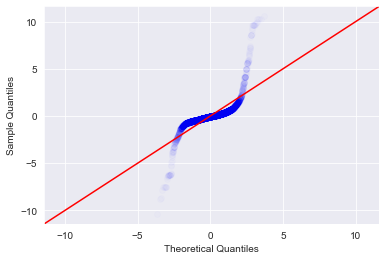

In [45]:
# Your code here - Check that the residuals are normally distributed
#qqplot
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True, 
                         alpha=0.01)
#Suffering from outliers

In [50]:
x4_cols

Index(['piece_count', 'num_reviews', 'play_star_rating', 'ages_10_16',
       'ages_11_16', 'ages_12_16', 'ages_14plus', 'ages_2_5', 'ages_5plus',
       'ages_6_12', 'ages_7_12', 'ages_7_14', 'ages_8_12', 'ages_8_14',
       'ages_9plus', 'ages_9_12', 'ages_9_14', 'theme_name_Architecture',
       'theme_name_BOOST', 'theme_name_Blues_Helicopter_Pursuit',
       'theme_name_BrickHeadz', 'theme_name_Carnotaurus_Gyrosphere_Escape',
       'theme_name_City', 'theme_name_Classic', 'theme_name_Creator_Expert',
       'theme_name_DIMENSIONS', 'theme_name_Dilophosaurus_Outpost_Attack',
       'theme_name_Ghostbusters', 'theme_name_Ideas',
       'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
       'theme_name_Marvel_Super_Heroes', 'theme_name_Minecraft',
       'theme_name_Minifigures', 'theme_name_NINJAGO',
       'theme_name_SERIOUS_PLAY', 'theme_name_Star_Wars',
       'theme_name_T_rex_Transport', 'theme_name_THE_LEGO_NINJAGO_MOVIE',
       'country_CA', 'country_CZ', 'country_DN',

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

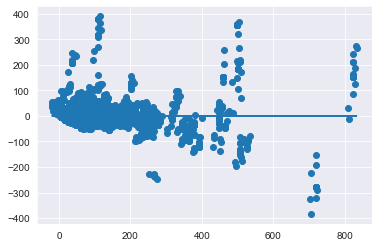

In [52]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model4.predict(train[x_cols]), model4.resid)
plt.plot(model4.predict(train[x_cols]), [0 for i in range(len(train))]);

In [ ]:
# Also, you see all the up and down skews from the outliers

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

## Removing Outliers

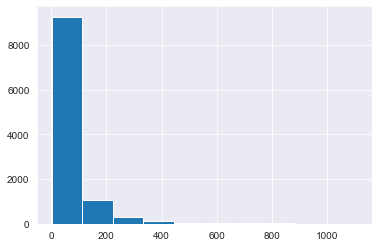

In [57]:
# Your code here - Check for outliers
df['list_price'].hist();

In [58]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [61]:
len(df[df.list_price>400])

180

In [ ]:
# Cut list_price at 400... because who needs a $400 lego set

In [75]:
og_df_length = len(df)
# Cut original df to remove list_price outliers
df_nouts = df[df.list_price < 400] # Subsetting to remove extreme outliers
print('Percent removed:', (og_df_length - len(df_nouts))/og_df_length)
df_nouts.list_price = df_nouts.list_price.map(np.log) # Applying a log transformation

Percent removed: 0.01655933762649494


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
# If you're the top 1.66%, you're outta here!!!

In [86]:
Y = df_nouts.list_price
X = df_nouts.drop(columns='list_price',axis=1)

In [87]:
len(Y)

10690

In [88]:
len(X)

10690

In [92]:
train, test = train_test_split(df_nouts)

In [93]:
predictors = '+'.join(x4_cols)
formula = outcome + "~" + predictors
model5 = ols(formula=formula, data=train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     458.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:24:17   Log-Likelihood:                -5138.4
No. Observations:                8017   AIC:                         1.037e+04
Df Residuals:                    7969   BIC:                         1.071e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4290      0.015    232.759      0.000       3.400       3.458
piece_count                                          0.6845      0.012     56.123      0.000       0.661       0.708
num_reviews                                         -0.0396      0.009     -4.615      0.000      -0.056      -0.023
play_star_rating                                     0.0093      0.006      1.626      0.104      -0.002       0.020
ages_10_16                                           0.5393      0.049     11.039      0.000       0.444       0.635
ages_11_16                                           0.2484      0.079      3.161      0.002       0.094       0.403
ages_12_16                                          -0.1545      0.086     -1.805      0.071      -0.322       0.013
ages_14plus                                          0.4199      0.055      7.608      0.000       0.312       0.528
ages_2_5                                             0.4991      0.023     21.976      0.000       0.455       0.544
ages_5plus                                          -0.7410      0.038    -19.540      0.000      -0.815      -0.667
ages_6_12                                            0.0790      0.018      4.288      0.000       0.043       0.115
ages_7_12                                            0.1966      0.026      7.621      0.000       0.146       0.247
ages_7_14                                            0.0942      0.021      4.425      0.000       0.052       0.136
ages_8_12                                            0.3674      0.034     10.859      0.000       0.301       0.434
ages_8_14                                            0.4525      0.023     19.362      0.000       0.407       0.498
ages_9plus                                           0.4554      0.120      3.806      0.000       0.221       0.690
ages_9_12                                            0.5599      0.082      6.861      0.000       0.400       0.720
ages_9_14                                            0.6159      0.034     18.173      0.000       0.549       0.682
theme_name_Architecture                              0.3229      0.043      7.433      0.000       0.238       0.408
theme_name_BOOST                                     1.0823      0.142      7.617      0.000       0.804       1.361
theme_name_Blues_Helicopter_Pursuit                  0.5807      0.118      4.938      0.000       0.350       0.811
theme_name_BrickHeadz                               -0.4693      0.030    -15.548      0.000      -0.528      -0.410
theme_name_Carnotaurus_Gyrosphere_Escape             0.9222      0.114      8.067      0.000       0.698       1.146
theme_name_City                          

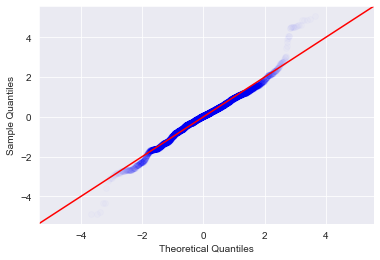

In [94]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True, 
                         alpha=0.01)

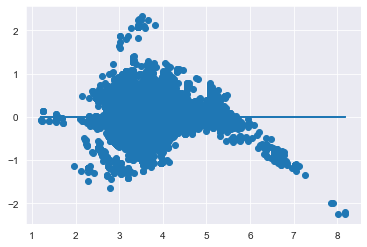

In [96]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model5.predict(train[x_cols]), model5.resid)
plt.plot(model5.predict(train[x_cols]), [0 for i in range(len(train))]);

0.8 percentile: 4.447203233446613
0.81 percentile: 4.498475447317128
0.82 percentile: 4.516205630058463
0.83 percentile: 4.580752485605895
0.84 percentile: 4.605070180987758
0.85 percentile: 4.64314011723972
0.86 percentile: 4.6985494117910225
0.87 percentile: 4.75356519079386
0.88 percentile: 4.803520919691574
0.89 percentile: 4.8039210397329235
0.9 percentile: 4.866533950121999
0.91 percentile: 4.9415707057479565
0.92 percentile: 4.986259264721463
0.93 percentile: 5.066308383165093
0.94 percentile: 5.175515633270267
0.95 percentile: 5.273712125140692
0.96 percentile: 5.334590470535844
0.97 percentile: 5.480237832963184
0.98 percentile: 5.592432949518983
0.99 percentile: 5.742863504164559


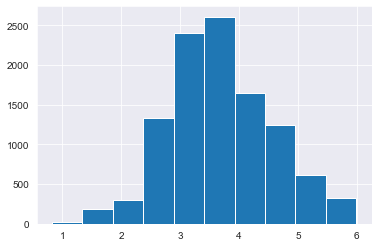

In [100]:
# Your code goes here
# Percentiles became more representative. 
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_nouts.list_price.quantile(q=q)))

df_nouts.list_price.hist();

In [107]:
len(df_nouts[df_nouts.list_price < 6])

10690

In [108]:
df_nouts.list_price.describe()

count    10690.000000
mean         3.663749
std          0.885847
min          0.820837
25%          3.072693
50%          3.599715
75%          4.248352
max          5.988926
Name: list_price, dtype: float64

In [ ]:
# Still have some on the low end that may be pulling it down. Let's see if a cut here improces it.

In [101]:
df_nouts_len = len(df_nouts)
# Cut original df to remove list_price outliers
df_nouts2 = df_nouts[df_nouts.list_price > 2] # Subsetting to remove extreme outliers - now on the low end
print('Percent removed:', (df_nouts_len - len(df_nouts2))/df_nouts_len)
# df_nouts2.list_price = df_nouts.list_price.map(np.log) # Applying a log transformation

Percent removed: 0.024883068288119738


In [102]:
train, test = train_test_split(df_nouts2)

In [103]:
predictors = '+'.join(x4_cols)
formula = outcome + "~" + predictors
model6 = ols(formula=formula, data=train).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     456.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:33:18   Log-Likelihood:                -4578.1
No. Observations:                7818   AIC:                             9250.
Df Residuals:                    7771   BIC:                             9578.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4797      0.014    244.323      0.000       3.452       3.508
piece_count                                          0.6542      0.012     56.588      0.000       0.632       0.677
num_reviews                                          0.0096      0.008      1.143      0.253      -0.007       0.026
play_star_rating                                    -0.0005      0.005     -0.094      0.925      -0.011       0.010
ages_10_16                                           0.4913      0.047     10.464      0.000       0.399       0.583
ages_11_16                                           0.1995      0.070      2.834      0.005       0.061       0.338
ages_12_16                                          -0.2957      0.089     -3.314      0.001      -0.471      -0.121
ages_14plus                                          0.3060      0.054      5.655      0.000       0.200       0.412
ages_2_5                                             0.4314      0.022     19.855      0.000       0.389       0.474
ages_5plus                                         1.51e-15    2.5e-16      6.036      0.000    1.02e-15       2e-15
ages_6_12                                            0.0314      0.018      1.789      0.074      -0.003       0.066
ages_7_12                                            0.1580      0.024      6.541      0.000       0.111       0.205
ages_7_14                                            0.0632      0.020      3.129      0.002       0.024       0.103
ages_8_12                                            0.3200      0.032      9.962      0.000       0.257       0.383
ages_8_14                                            0.4262      0.022     19.106      0.000       0.382       0.470
ages_9plus                                           0.5198      0.132      3.937      0.000       0.261       0.779
ages_9_12                                            0.4871      0.073      6.660      0.000       0.344       0.630
ages_9_14                                            0.5982      0.032     18.842      0.000       0.536       0.660
theme_name_Architecture                              0.2556      0.039      6.604      0.000       0.180       0.331
theme_name_BOOST                                     0.9840      0.116      8.478      0.000       0.756       1.212
theme_name_Blues_Helicopter_Pursuit                  0.5652      0.108      5.233      0.000       0.353       0.777
theme_name_BrickHeadz                               -0.5254      0.029    -18.125      0.000      -0.582      -0.469
theme_name_Carnotaurus_Gyrosphere_Escape             0.9398      0.108      8.694      0.000       0.728       1.152
theme_name_City                          

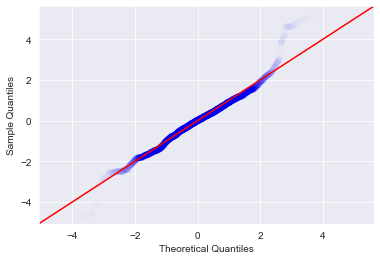

In [104]:
fig = sm.graphics.qqplot(model6.resid, dist=stats.norm, line='45', fit=True, 
                         alpha=0.01)

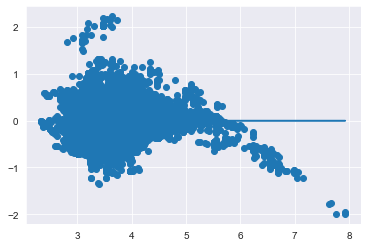

In [106]:
plt.scatter(model6.predict(train[x_cols]), model6.resid)
plt.plot(model6.predict(train[x_cols]), [0 for i in range(len(train))]);

In [109]:
y_hat_train = model6.predict(train)
rmse_train = mse(train.list_price, y_hat_train)**0.5
y_hat_test = model6.predict(test)
rmse_test = mse(test.list_price, y_hat_test)**0.5
print(f'Train RMSE: {rmse_train} \n Test RMSE: {rmse_test}')

Train RMSE: 0.4345889172240575 
 Test RMSE: 0.42903945299466756


## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 